# Análise do Titanic Dataset: Prevendo a Sobrevivência dos Passageiros

O objetivo principal desta análise é aplicar técnicas de modelagem preditiva para identificar quais fatores influenciaram as chances de sobrevivência dos passageiros do famoso navio, com base em características como idade, sexo, classe social, e outros atributos disponíveis no dataset.

# <b>De ínicio, damos uma olhada nos dados.</b>

In [2]:
#Importar bibliotecas que talvez usemos no futuro.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Leitura do dataset
# Carregar o dataset de treino
train_df = pd.read_csv('train.csv')

In [4]:
#Vendo a cara dos dados
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#Mais informações abaixo
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Informações que já podemos tirar analisando essas informações:


Trata-se de um arquivo com 891 linhas, com 12 colunas.

Dessas colunas, podemos separar as variáveis em numéricas e categóricas.

**Variáveis Numéricas**
1. Age(Numérica contínua) - Idade
2. SibSp(Numérica discreta) - Número de irmãos/cônjuges a bordo
3. Parch(Numérica discreta) - Número de pais/filhos a bordo
4. Fare(Numérica contínua) - Tarifa paga pelo passageiro

Lembrando que variáveis numéricas discretas são valores inteiros ou contáveis e variáveis contínuas podem assumir qualquer valor dentro de um intervalo.

**Variáveis Categóricas**
1. Pclass - Classe do passageiro
2. Name - Nome do passageiro
3. Sex - Sexo do passageiro
4. Ticket - Número do bilhete
5. Cabin - Número da Cabine
6. Embarked (C, Q, S) - Ponto de Embarque
7. Survived (Binária 0, 1) - Se o passageiro sobreviveu ou não

# Perguntas - Parte 1

Passo 1: Análise Exploratória de Dados

Perguntas iniciais para guiar a análise exploratória:

Qual é a distribuição de variáveis numéricas como Age, Fare, SibSp, Parch?

Como as variáveis categóricas (como Sex, Pclass, Embarked) estão distribuídas?

Existe algum padrão ou tendência interessante entre as variáveis? Como Age e Survived se correlacionam, por exemplo?

In [7]:
#Antes de iniciar, vamos substituir os valores NaN em idade pela mediana

# Preencher valores ausentes de 'Age' com a mediana
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [8]:
#Verificando se ainda há valores vazios nas colunas
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Como observado, há valores NaN em Cabin e Embarked, vamos tratar elas depois, caso a gente queira fazer alguma análise que irá considerar essas colunas.

**Qual é a distribuição de variáveis numéricas como Age, Fare, SibSp, Parch?**

Text(0, 0.5, 'Contagem')

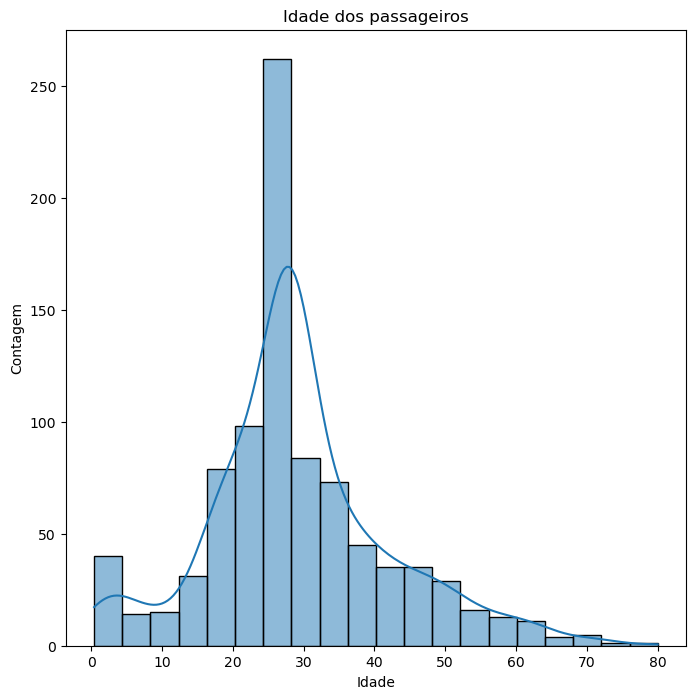

In [9]:
#Para variáveis contínuas, vamos utilizar o histplot, com KDE.
plt.figure(figsize=(8,8))
sns.histplot(data=train_df, x='Age', kde=True, bins=20)
plt.title('Idade dos passageiros')
plt.xlabel('Idade')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

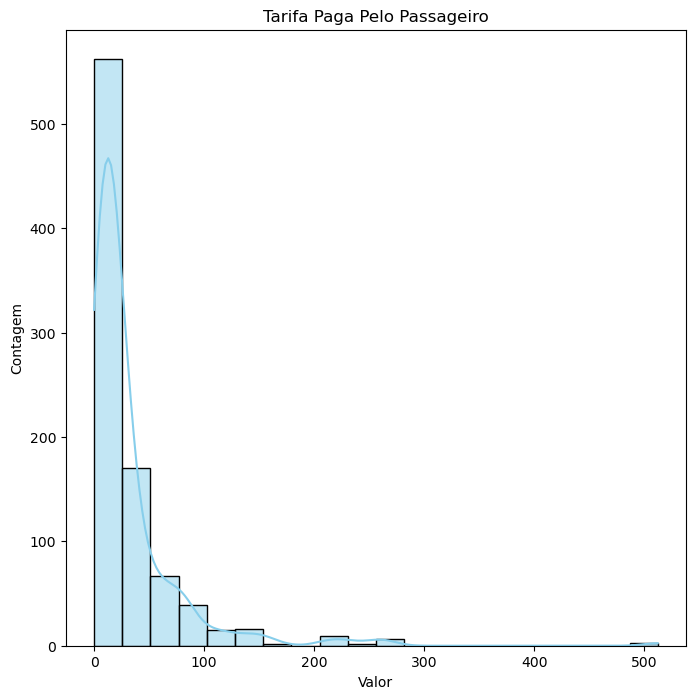

In [10]:
#Para variáveis contínuas, vamos utilizar o histplot, com KDE.
plt.figure(figsize=(8,8))
sns.histplot(data=train_df, x='Fare', kde=True, bins=20, color='skyblue')
plt.title('Tarifa Paga Pelo Passageiro')
plt.xlabel('Valor')
plt.ylabel('Contagem')


Text(0, 0.5, 'Frequência')

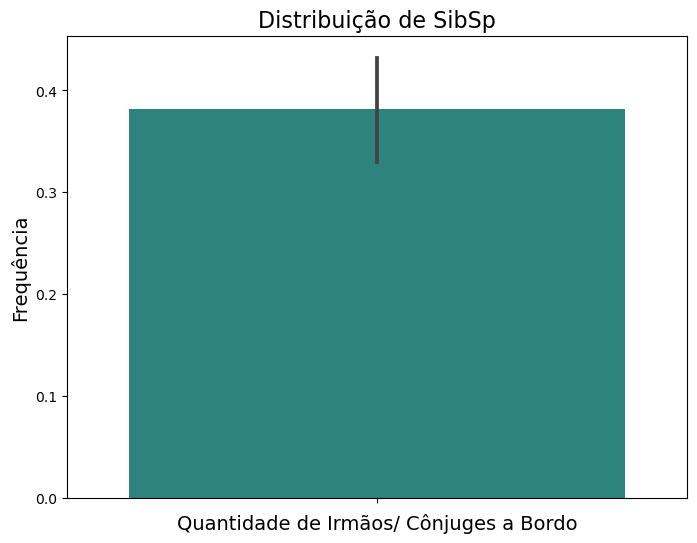

In [11]:
#Para variáveis contínuas discretas, vamos utilizar o barplot.
plt.figure(figsize=(8, 6))

ax = sns.barplot(data=train_df, y='Parch', palette='viridis')  # Usando uma paleta diferente para tornar o gráfico mais bonito

# Adicionando título e rótulos
ax.set_title('Distribuição de SibSp', fontsize=16)
ax.set_xlabel('Quantidade de Irmãos/ Cônjuges a Bordo', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)

Text(0, 0.5, 'Frequência')

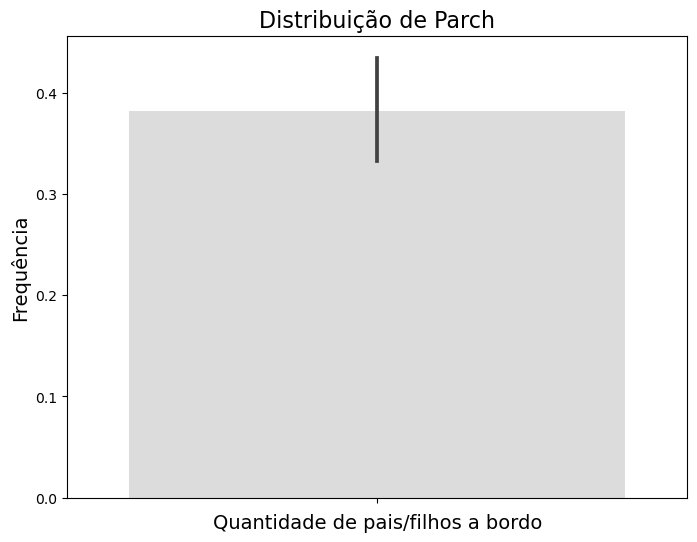

In [12]:
#Para variáveis contínuas discretas, vamos utilizar o barplot.
plt.figure(figsize=(8, 6))

ax = sns.barplot(data=train_df, y='Parch', palette='coolwarm')  # Usando uma paleta diferente para tornar o gráfico mais bonito

# Adicionando título e rótulos
ax.set_title('Distribuição de Parch', fontsize=16)
ax.set_xlabel('Quantidade de pais/filhos a bordo', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)

**Conclusão:**
Observamos que a idade predominante dos passageiros está próxima dos 30 anos. Além disso, a maioria dos passageiros pagou uma tarifa de até 25 dólares. Em relação à quantidade de irmãos/cônjuges a bordo, a frequência ficou em 0.5, ou seja, 50% dos passageiros têm 1 irmão ou cônjuge a bordo. Já a quantidade de pais/filhos a bordo apresentou uma frequência um pouco abaixo de 0.4, o que significa que cerca de 40% dos passageiros têm 1 ou mais pais/filhos a bordo.

In [13]:
#Pulando linha

**Como as variáveis categóricas (como Sex, Pclass, Embarked) estão distribuídas?**

Text(0, 0.5, 'Contagem')

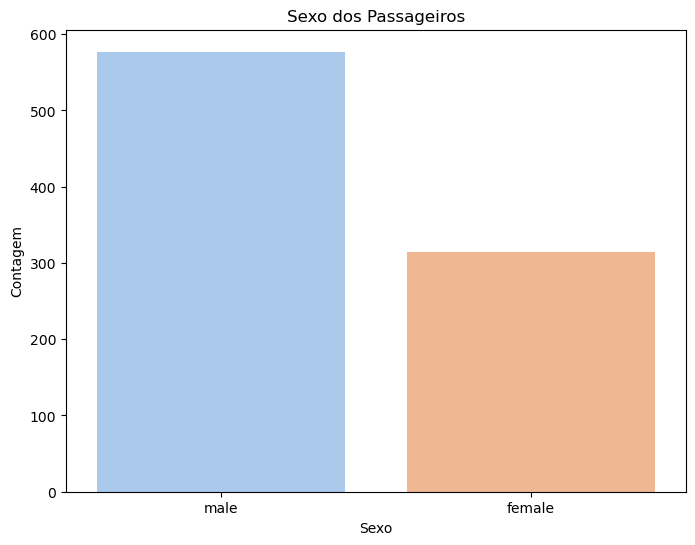

In [14]:
#Utilizarei Countplot para Sex e Pclass
#Começando com a coluna Sex
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x="Sex", palette='pastel')
plt.title('Sexo dos Passageiros')
plt.xlabel('Sexo')
plt.ylabel('Contagem')

Text(0, 0.5, 'Contagem')

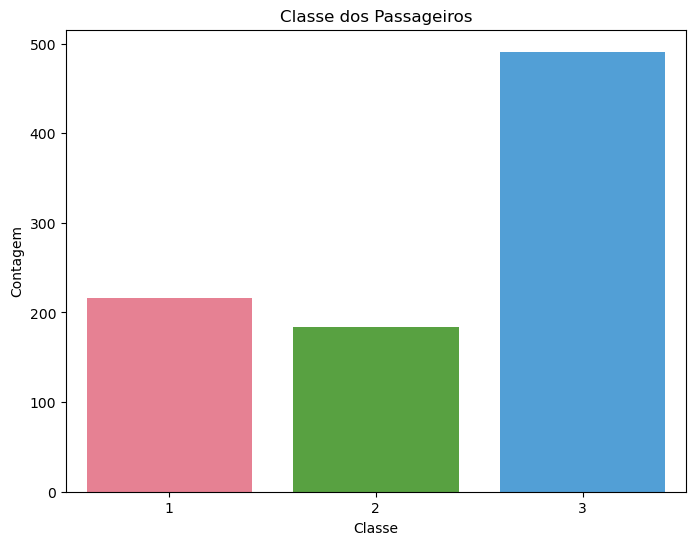

In [15]:
#Utilizarei Countplot para Sex e Pclass
#Agora para a coluna Pclass
plt.figure(figsize=(8,6))
palette = sns.color_palette('husl', 3) 
sns.countplot(data=train_df, x="Pclass", palette=palette)
plt.title('Classe dos Passageiros')
plt.xlabel('Classe')
plt.ylabel('Contagem')

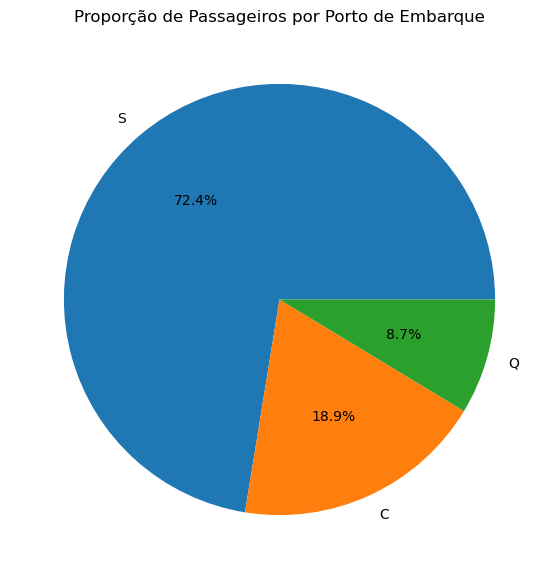

In [16]:
#Para Embarked usarei um gráfico percentual

train_df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7, 7))
plt.title('Proporção de Passageiros por Porto de Embarque')
plt.ylabel('')  # Remove o rótulo do eixo Y
plt.show()

**Conclusão:** A maioria dos passageiros a bordo do Titanic era composta por homens. Em relação às classes sociais, a classe 3 foi a que teve o maior número de passageiros, seguida pela classe 1 e, por último, pela classe 2. No gráfico de porcentagem que analisamos, observamos que a grande maioria dos passageiros, 72,4% embarcou em Southampton, uma cidade localizada no sul da Inglaterra. Os demais passageiros partiram de Cherbourg, na França, representando 18,9%, enquanto 8,7% embarcaram de Queenstown (atualmente conhecida como Cobh), na Irlanda.

In [17]:
#Pulando linha

**Existe algum padrão ou tendência interessante entre as variáveis? Como Age e Survived se correlacionam, por exemplo?**

In [18]:
#Vamos ver se essa duas variáveis se correlacionam.
correlation = train_df[['Age', 'Survived']].corr()
print(correlation)

              Age  Survived
Age       1.00000  -0.06491
Survived -0.06491   1.00000


Isso significa que, em termos estatísticos, não há uma relação significativa

# Perguntas - Parte 2

Passo 2: Limpeza de Dados

Existem valores ausentes nas variáveis? Se sim, qual a melhor forma de lidar com eles? (Por exemplo, preencher Age com a média ou mediana, ou descartar linhas com valores ausentes?)

Há alguma variável irrelevante que podemos descartar, como o nome (Name) ou o número do bilhete (Ticket)?

Precisamos transformar algum tipo de variável? Por exemplo, devemos transformar a variável Sex em uma variável binária (0 ou 1)?

**Existem valores ausentes nas variáveis? Se sim, qual a melhor forma de lidar com eles? (Por exemplo, preencher Age com a média ou mediana, ou descartar linhas com valores ausentes?)**

A idade tem uma distribuição assimétrica à direita (skewed to the right), o que significa que há uma concentração de valores mais baixos (muitas pessoas mais jovens, especialmente crianças e jovens adultos), e algumas idades muito altas (como pessoas idosas), que são outliers ou valores extremos.


Dado que a variável Age no dataset Titanic tem uma distribuição assimétrica à direita, com uma concentração maior de idades mais baixas e alguns valores mais altos (outliers), a mediana seria a escolha mais adequada para preencher os valores ausentes.

Por que a mediana? A mediana é mais robusta em relação a outliers e não é influenciada por valores extremos.

**Há alguma variável irrelevante que podemos descartar, como o nome (Name) ou o número do bilhete (Ticket)?**

Acredito que o local de embarque não seja relevante para nenhuma análise que formos fazer.

**Precisamos transformar algum tipo de variável? Por exemplo, devemos transformar a variável Sex em uma variável binária (0 ou 1)?**

Quando formos fazer análise com Machine Learning, parece ser uma mudança interessante, principalmente para fazer previsões e análises mais profundas com base no genéro dos passageiros. Por hora, vou deixar o dataset como está.

In [19]:
#Pulando linha

Existem duplicatas no dataset? Se sim, elas devem ser removidas ou mantidas?

Como lidar com outliers em variáveis como Fare? Devemos descartá-los, transformá-los, ou mantê-los como estão?

Devemos normalizar ou padronizar variáveis contínuas como Age e Fare para análises mais robustas?

In [20]:
#Preenchendo os valores NaN de Embarked com o local mais comum de embarque.
train_df['Embarked'].fillna("C", inplace=True)

In [21]:
#Verificando se há duplicatas
train_df.duplicated().sum()

0

Portanto não há duplicatas em nosso dataframe.

In [22]:
#Verificando os Outliers da coluna Fare.

Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando outliers
outliers = train_df[(train_df['Fare'] < limite_inferior) | (train_df['Fare'] > limite_superior)]

#Exibir
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S


Vou escolher manter os outliers como estão, pois, modelos como o Random Forest lidam bem com outliers.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

Eu escolhi padronizar para garantir que ambas as variáveis tenha o mesmo impacto em minhas análises. Pois, ao padronizar, eu garanto que o resultado é que agora as variáveis Age e Fare terão média 0 e desvio padrão 1.


Média igual a 0: Isso significa que, após a padronização, a média dos valores em cada coluna será 0. Isso pode ser útil porque evita que uma variável com uma média maior ou menor afete os cálculos.

Desvio padrão igual a 1: Isso garante que a variação ou dispersão dos dados seja a mesma para ambas as variáveis. Com o desvio padrão igual a 1, as variáveis estão na mesma escala, o que é especialmente importante para modelos que dependem de distância (como KNN ou redes neurais) ou para modelos paramétricos (como regressão linear), que assumem que as variáveis têm a mesma importância.

# Perguntas - Parte 3

Perguntas sobre visualização:

Como podemos visualizar as distribuições de variáveis como Age, Fare, SibSp e Parch?

Podemos explorar a relação entre variáveis numéricas e Survived? Por exemplo, qual a taxa de sobrevivência em diferentes faixas 
de Age ou Fare?

Podemos usar gráficos de dispersão (scatterplots) para explorar a relação entre as variáveis?

In [24]:
#A primeira já respondemos, vamos para a segunda.

**Podemos explorar a relação entre variáveis numéricas e Survived? Por exemplo, qual a taxa de sobrevivência em diferentes faixas de Age ou Fare?**

AgeGroup
0-10%      0.550000
11-30%     0.355932
31-50%     0.312977
51-70%     0.418605
71-90%     0.389831
91-100%    0.415730
Name: Survived, dtype: float64
FareGroup
0-10%      0.141304
11-30%     0.233161
31-50%     0.333333
51-70%     0.468927
71-90%     0.450000
91-100%    0.758621
Name: Survived, dtype: float64


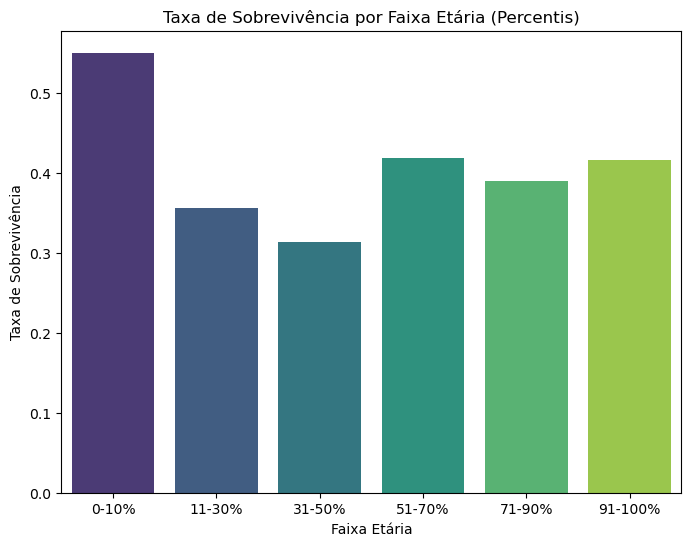

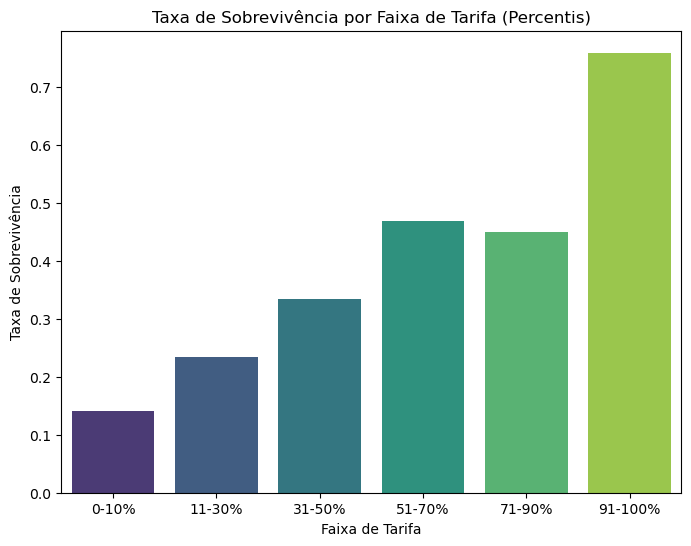

In [25]:
# Verificando se há valores ausentes em 'Age' e 'Fare' e preenchendo se necessário
# Não há valores ausentes, mas estamos incluindo este código como uma medida de segurança
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())

# Criando faixas de "Age" com base em percentis
age_percentiles = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
age_bins = train_df['Age'].quantile(age_percentiles).values
age_labels = ['0-10%', '11-30%', '31-50%', '51-70%', '71-90%', '91-100%']

# Criando a coluna de faixas para "Age"
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Calculando a taxa de sobrevivência por faixa de idade
survival_rate_by_age = train_df.groupby('AgeGroup')['Survived'].mean()
print(survival_rate_by_age)

# Criando faixas de "Fare" com base em percentis
fare_percentiles = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
fare_bins = train_df['Fare'].quantile(fare_percentiles).values
fare_labels = ['0-10%', '11-30%', '31-50%', '51-70%', '71-90%', '91-100%']

# Criando a coluna de faixas para "Fare"
train_df['FareGroup'] = pd.cut(train_df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

# Calculando a taxa de sobrevivência por faixa de tarifa
survival_rate_by_fare = train_df.groupby('FareGroup')['Survived'].mean()
print(survival_rate_by_fare)

# Visualizando as taxas de sobrevivência para faixas de idade
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_age.index, y=survival_rate_by_age.values, palette="viridis")
plt.title('Taxa de Sobrevivência por Faixa Etária (Percentis)')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

# Visualizando as taxas de sobrevivência para faixas de tarifa
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_fare.index, y=survival_rate_by_fare.values, palette="viridis")
plt.title('Taxa de Sobrevivência por Faixa de Tarifa (Percentis)')
plt.xlabel('Faixa de Tarifa')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

**Podemos usar gráficos de dispersão (scatterplots) para explorar a relação entre as variáveis?**

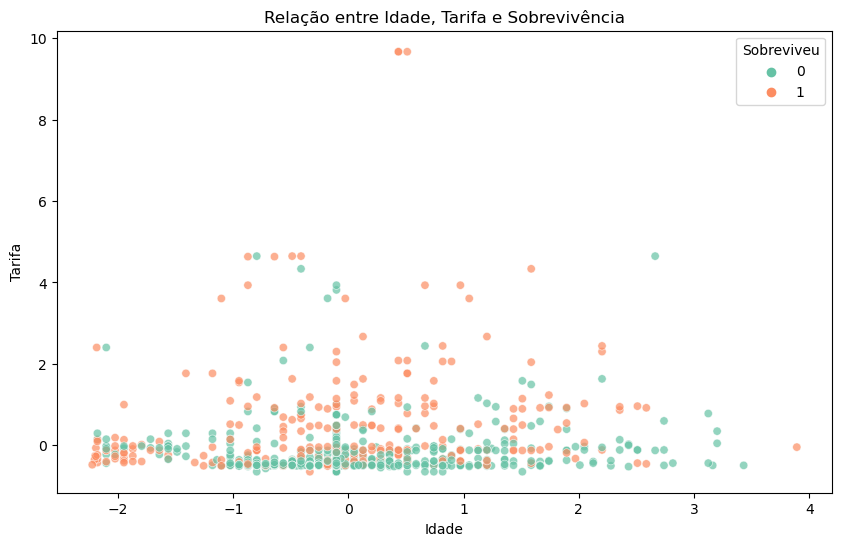

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', alpha=0.7, palette='Set2')
plt.title('Relação entre Idade, Tarifa e Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.legend(title='Sobreviveu')
plt.show()

Idades mais jovens associadas a tarifas mais altas sobreviveram?

**R:** Pelo gráfico de taxa de sobrevivência por faixa etária, notamos que a faixa de 0-10% tem a maior taxa de sobrevivência. ou seja, os mais jovens em termos de percentils sobreviveram mais. No gráfico de taxa de sobrevivência por faixa de tarifa, notamos que sim, pessoas que pagaram mais, tiveram mais chances de sobreviver. Agora, vamos tentar encontrar a relação para confirmar se de fato foram os jovens que foram 'beneficiados' por isso. Para isso, vamos utilizar o pd.crosstab().
Pelo que notamos no output gerado pelo código, que na faixa de 11-30% de idade, quando maior o valor pago no bilhete, maior os sobreviventes.

Alguma faixa de tarifa teve maior concentração de sobreviventes?

**R:** Notamos que 91-100% da faixa de tarifa, correspondeu a uma taxa de sobrevivência de quase 70%. Então, a faixa de maior valor, concentrou os maiores sobreviventes.

In [27]:
#Aqui em relação a primeira pergunta:
cross_tab_sobrevivencia = train_df.groupby(['AgeGroup', 'FareGroup'])['Survived'].mean().unstack()
cross_tab_sobrevivencia
#Também poderiámos ter usado o reset_index(), utilizamos o unstack pra ter uma visualização melhor

FareGroup,0-10%,11-30%,31-50%,51-70%,71-90%,91-100%
AgeGroup,,,,,,
0-10%,0.666667,0.571429,0.666667,0.689655,0.333333,0.857143
11-30%,0.230769,0.239130,0.195652,0.571429,0.619048,0.705882
31-50%,0.138889,0.235955,0.363636,0.346154,0.461538,0.615385
51-70%,0.000000,0.285714,0.476190,0.411765,0.437500,1.000000
71-90%,0.000000,0.136364,0.281250,0.428571,0.457143,0.821429
91-100%,0.000000,0.000000,0.266667,0.500000,0.466667,0.687500


In [28]:
pd.crosstab(train_df['AgeGroup'], train_df['FareGroup'])

FareGroup,0-10%,11-30%,31-50%,51-70%,71-90%,91-100%
AgeGroup,,,,,,
0-10%,3,7,15,29,39,7
11-30%,26,46,46,21,21,17
31-50%,36,89,33,52,39,13
51-70%,5,21,21,17,16,6
71-90%,18,22,32,42,35,28
91-100%,4,8,15,16,30,16


Passageiros com famílias grandes tendiam a pagar menos?

**R:** Notamos tanto pelo gráfico, tanto pela correlação que isso não é necessariamente verdade.

Algum padrão em famílias pequenas e tarifas altas?

**R:** Sim, há um padrão: famílias pequenas tendem a pagar tarifas mais altas, especialmente na primeira classe. A análise mostra que passageiros com famílias menores geralmente viajaram em classes superiores, onde as tarifas eram mais caras. Isso sugere que, em geral, famílias pequenas estavam associadas a um maior poder aquisitivo, refletido nas tarifas mais altas pagas.

C:\Users\jrodr\AppData\Local\Temp\ipykernel_17004\3318963869.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train_df, x='SibSp', y='Fare', alpha=0.7, palette='viridis')


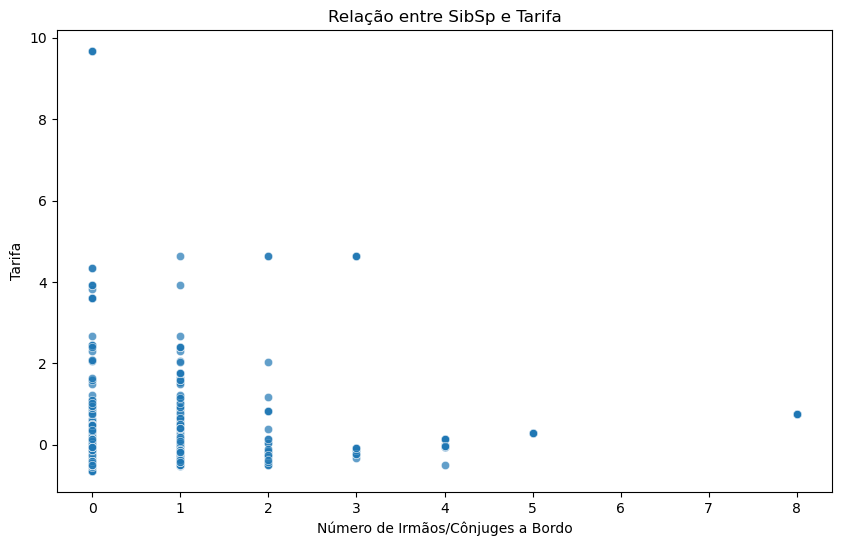

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='SibSp', y='Fare', alpha=0.7, palette='viridis')
plt.title('Relação entre SibSp e Tarifa')
plt.xlabel('Número de Irmãos/Cônjuges a Bordo')
plt.ylabel('Tarifa')
plt.show()

In [30]:
#Vamos ver se essa duas variáveis se correlacionam.
correlation = train_df[['SibSp', 'Fare']].corr()
print(correlation)

          SibSp      Fare
SibSp  1.000000  0.159651
Fare   0.159651  1.000000


# Perguntas - Parte 4

Conclusões da Análise Exploratória

Com base na exploração dos dados, algumas possíveis conclusões iniciais podem incluir:

Qual a taxa de sobrevivência geral?

**R:** Aproximadamente 38%

Quais variáveis estão mais fortemente associadas à sobrevivência?

**R:** Aqui, fizemos uma separação para avaliar Survived em relação as variáveis numéricas e categóricas. Para variáveis numéricas, notamos que Fare e Parch tem correlação positiva com Survived. Porém, apenas Fare é que tem uma participação mais presente, em torno de 25% de relação positiva. Enquanto as outras, tem pouco impacto e notamos que a Pclass é que teve a menor correlação. Já para as variáveis categóricas, notamos que o sexo feminino sobreviveu em torno de 74%, enquanto para o sexo masculino essa taxa foi de aproximadamente 19%. Notamos que a terceira classe(a mais pobre) teve o menor índice de sobreviventes. Além disso, o maior índice de sobreviventes partiu de Cherbourg, na França. Para outras variáveis categóricas como o Ticket por exemplo, fizemos um tratamento especial, onde obtivemos os prefixos dos tickets para saber mais sobre o passageiro e conseguir calcular a taxa de sobrevivência deles. Fizemos de forma análoga para a coluna 'Name' para obter os títulos e observar se, pessoas 'importantes' tiveram uma alta taxa de sobrevivência e notamos que sim, tiveram. Fizemos o mesmo para a cabine.

Quais grupos de passageiros tiveram maiores chances de sobreviver (por exemplo, mulheres, crianças, passageiros de primeira classe)?

**R:** Pela nossa análise, mulheres, crianças e pessoas de primeira classe, além de pessoas atentidas por títulos como Mrs, Milady, lady, etc.. tiveram maior chance de sobreviver. Como notamos também, passageiros de primeira classe foram os maiores beneficiados no resgate ou salvamentos por botes.

In [31]:
#Primeira pergunta
(train_df[train_df['Survived'] == 1]['Survived'].shape[0]/train_df.shape[0])*100

38.38383838383838

In [32]:
#Segunda Pergunta, vamos usar matrix de correlação para as variáveis numéricas

In [33]:
train_df.corr(method='pearson', min_periods=1, numeric_only=True)['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

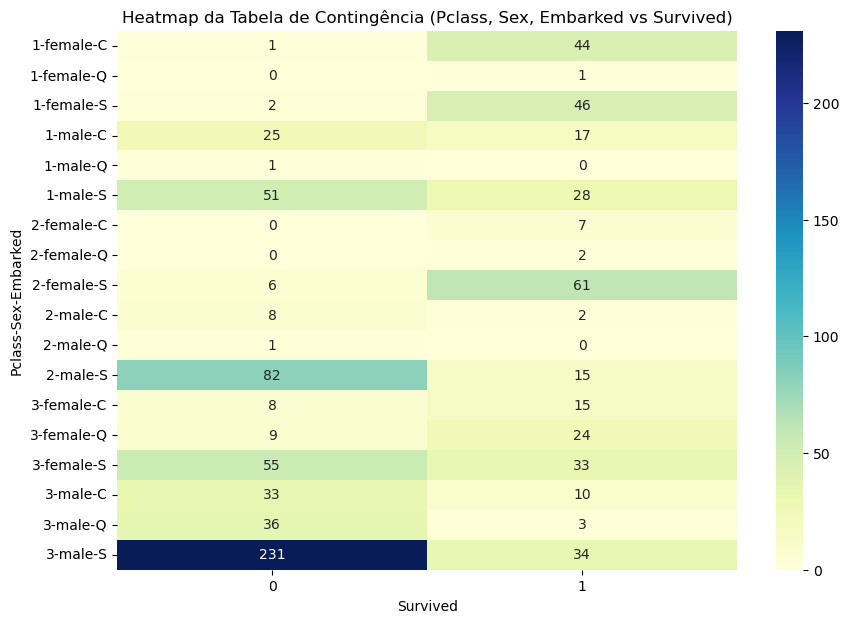

In [34]:
#Já para variáveis categóricas, vamos usar uma tabela de contingência

tabela_contingencia = pd.crosstab([train_df['Pclass'], train_df['Sex'], train_df['Embarked']], train_df['Survived'])

# Criando o heatmap
plt.figure(figsize=(10, 7))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(tabela_contingencia, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

# Exibindo o gráfico
plt.title('Heatmap da Tabela de Contingência (Pclass, Sex, Embarked vs Survived)')
plt.show()

In [35]:
#Além do Heatmap acima, vamos calcular a taxa média de sobrevivência por categórias

taxa_sobrevivencia_sexo = train_df.groupby('Sex')['Survived'].mean()
print(taxa_sobrevivencia_sexo)

taxa_sobrevivencia_classe = train_df.groupby('Pclass')['Survived'].mean()
print(taxa_sobrevivencia_classe)

taxa_sobrevivencia_embarque = train_df.groupby('Embarked')['Survived'].mean()
print(taxa_sobrevivencia_embarque)



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.558824
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [36]:
'''Agora para outras variáveis categóricas, precisamos de uma análise a parte. Vamos começar pelo Ticket
que pode fornecer informações valiosas sobre a classe ou categoria dos passageiros'''
train_df['Ticket_prefix'] = train_df['Ticket'].str.extract('([A-Za-z]+)', expand=False)
# Taxa de sobrevivência por Ticket_prefix
taxa_survived_ticket_prefix = train_df.groupby('Ticket_prefix')['Survived'].mean()
print(taxa_survived_ticket_prefix)

Ticket_prefix
A        0.068966
C        0.454545
CA       0.071429
F        0.666667
Fa       0.000000
LINE     0.250000
P        0.500000
PC       0.650000
PP       0.666667
S        0.142857
SC       0.538462
SCO      0.000000
SO       1.000000
SOTON    0.117647
STON     0.444444
SW       1.000000
W        0.090909
WE       0.500000
Name: Survived, dtype: float64


[A-Za-z]: Isso é um intervalo de caracteres.

A-Z: Refere-se a todas as letras maiúsculas do alfabeto (de A a Z).
a-z: Refere-se a todas as letras minúsculas do alfabeto (de a a z).
Juntas, [A-Za-z] significa "qualquer letra, maiúscula ou minúscula".
+: O símbolo + significa "um ou mais". Então, quando colocado após o intervalo de caracteres, ele significa "uma ou mais letras" (maiúsculas ou minúsculas). Por exemplo, ele capturaria palavras como "A", "ab", "abc", etc.

(): Os parênteses () são usados para capturar o que está dentro deles. No caso, eles estão agrupando o padrão [A-Za-z]+, ou seja, estão dizendo que queremos capturar uma sequência de uma ou mais letras.

O que a expressão '([A-Za-z]+)'

In [37]:
'''
Extraindo o título do passageiro

'''
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
taxa_survived_name_prefix = train_df.groupby('Title')['Survived'].mean()
print(taxa_survived_name_prefix)

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64


In [38]:
# Extrair a letra da cabine (se houver)
train_df['Cabin_letter'] = train_df['Cabin'].str.extract('([A-Za-z])', expand=False)

# Taxa de sobrevivência por letra da cabine
taxa_survived_cabin_letter = train_df.groupby('Cabin_letter')['Survived'].mean()
print(taxa_survived_cabin_letter)

Cabin_letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64


# Perguntas - Parte 5

Finalmente, vamos entrar na etapa de análise com <i><b>Machine Learning.</b></i> É importante destacar que este projeto utiliza dois datasets: o <i><b>train.csv</b></i>, que trabalhamos até agora, e o <i><b>test.csv</b></i>, que será utilizado para avaliar o modelo que iremos construir. Nosso objetivo com o Machine Learning é criar um modelo capaz de prever quais passageiros sobreviveram, e avaliaremos sua performance com base na acurácia das previsões realizadas.


Temos que garantir que ambas as bases estejam iguais, ou seja, todo tratamento que foi feito para train.csv terá que ser feito para test.csv

In [39]:
#Vamos agora trabalhar com test.csv
test_df = pd.read_csv('test.csv')

In [40]:
#Repare que, não há a coluna 'Survived', coluna que está presente em train.csv
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [41]:
#Verificando se há valores vazios
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Repare que na coluna 'Fare' há valor nulo, o que também difere de train.csv que não possuia valores nulos nesse campo.

Abaixo, vamos tratar os valores NaN.

In [42]:
#Para Age
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
#Para  Fare
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)


In [43]:
#Utilizando StandardScaler também nos dados de teste.
# Reaproveitando o scaler ajustado com o conjunto de treino
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])

Para manter o alinhamento com o train.csv, recriamos as colunas adicionais: AgeGroup, FareGroup, Ticket_prefix, Title e Cabin_letter. Vou exemplificar cada uma, mas basicamente, a construção deve ser idêntica para não gerar erros no futuro.

In [44]:
#AgeGroup e FareGroup
# Garantir que bins e labels sejam consistentes com o treino
test_df['AgeGroup'] = pd.cut(
    test_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True
)
test_df['AgeGroup'] = test_df['AgeGroup'].cat.add_categories(['Unknown']).fillna('Unknown')

test_df['FareGroup'] = pd.cut(
    test_df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True
)


Ainda há valores nulos em algumas colunas, que até então, não estavam sendo utilizadas. Para nossa análise com ML, é importante não haver valores nulos em nenhuma coluna, de nenhum arquivo. Vamos tratar abaixo:

Vamos eliminar as colunas 'Cabin'; 'Cabin_letter' e 'Ticket_prefix' do arquivo train_df e 'Cabin' de test_df

In [45]:
train_df = train_df.drop(columns=['Cabin', 'Cabin_letter', 'Ticket_prefix'])
test_df = test_df.drop(columns=['Cabin'])

In [46]:
#Title
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

Bom, agora vamos para a análise de Machine Learning de fato. Antes, um último ajuste, pois a coluna Survived está presente em train_df e não em test_df. Além disso, vamos remover algumas colunas que não tem impacto na predição, ou até tem, porém são difíceis de quantificar diretamente.

Também removemos, PassangerId; Name; Ticke e Title(<b>Essa será incorporada novamente no futuro</b>).

Para as outrar variáveis categóricas que são importantes, precisamos usar o método com One-Hot-Encoding.

<i><b>Treinando nosso modelo </b></i>

In [47]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Title'])
y = train_df['Survived']

# Para o dataset de teste, removemos colunas que não serão usadas no modelo
X_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Title'])

In [48]:
#Testando os dados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos começar pelo modelo de <i><b>Regressão Logística.</b></i> Vamos utilizar o método One-Hot-Encoding para variáveis categóricas que estarão alimentando o modelo.

In [49]:
#Tratando variáveis categóricas com One-Hot-Encoding
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked', 'AgeGroup', 'FareGroup'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked', 'AgeGroup', 'FareGroup'], drop_first=True)


In [50]:
# Garantir que as colunas sejam consistentes entre treino e teste
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [51]:
from sklearn.linear_model import LogisticRegression
# Instanciar e treinar o modelo
clf = LogisticRegression(random_state=0, max_iter=10000)
clf.fit(X_train, y_train)



LogisticRegression(max_iter=10000, random_state=0)

In [52]:
#Vamos prever utilizando os dados de teste
y_pred = clf.predict(X_test)

<i><b>Importanto as métricas para avaliar o modelo.</b></i>

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Acurácia
accuracy = accuracy_score(y_test, y_pred)

# Precisão
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-Score
f1 = f1_score(y_test, y_pred)

# Imprimir os resultados
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.82
Precisão: 0.81
Recall: 0.74
F1-Score: 0.77


In [54]:
# Matriz de Confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[92 13]
 [19 55]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



<i><b>2.</b></i> Vamos utilizar o modelo de <b>Random Forest</b>:


In [55]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar o modelo com parâmetros padrão
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)

In [56]:
#Treinando o modelo com os dados balanceados
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [57]:
#Fazendo previsões desse conjunto de teste
y_pred_rf = rf_clf.predict(X_test)

In [58]:
#Avaliando novamente

# Avaliação
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Imprimir resultados
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Acurácia: 0.82
Precisão: 0.85
Recall: 0.69
F1-Score: 0.76


Observe que com o modelo de RandomForest não tivemos melhoras, na verdade, a acurácia do nosso modelo permaneceu a mesma.

# Parte 6 - Análise mais profunda de Machine Learning.

Vamos para uma análise mais profunda, nosso objetivo é tentar chegar em 87% de acertos na previsão. Para isso vamos implementar alguns passos que serão detalhados abaixo.

<i><b>1.</b></i> Balanceamento de Classes:


Vamos usar SMOTE para gerar amostras sintéticas, pois, nesse conjunto de dados a tendência é ter mais não sobreviventes do que sobreviventes, o que pode impactar o modelo.

<i><b>2.</b></i> Além disso, vamos trabalhar com engenharia de Features para tentar realçar a precisão do nosso modelo. Para isso, vamos voltar com a coluna 'Title', pois, ela está ligada fortemente a taxa de sobrevivência.

In [59]:
# Extraindo 'Title' novamente dos nomes no conjunto de treino e teste
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Adicionando 'Title' ao X_train e X_test
X_train['Title'] = train_df['Title']
X_test['Title'] = test_df['Title']


In [60]:
# Realizando One-Hot Encoding para 'Title' (sem a coluna Title no dataset)
X_train = pd.get_dummies(X_train, columns=['Title'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Title'], drop_first=True)

# Garantir que as colunas 'Title' do treino e do teste sejam consistentes
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [61]:
from imblearn.over_sampling import SMOTE

# Inicializando o SMOTE
smote = SMOTE(random_state=42)

# Ajustando e aplicando SMOTE nos dados de treinamento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificando a quantidade de exemplos após o balanceamento
print(f'Antes do SMOTE - Classes: {y_train.value_counts()}')
print(f'Após o SMOTE - Classes: {y_train_smote.value_counts()}')


Antes do SMOTE - Classes: Survived
0    444
1    268
Name: count, dtype: int64
Após o SMOTE - Classes: Survived
0    444
1    444
Name: count, dtype: int64


In [62]:
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo de Regressão Logística
clf = LogisticRegression(random_state=0, max_iter=10000)

# Treinando o modelo
clf.fit(X_train_smote, y_train_smote)  # Ou X_train e y_train se não usar SMOTE


LogisticRegression(max_iter=10000, random_state=0)

In [63]:
# Fazendo previsões com o modelo treinado
y_pred = clf.predict(X_test)

# Avaliando a performance do modelo (por exemplo, com a acurácia)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')


Acurácia: 72.07%


<b>Conclusão:</b> A queda na acurácia pode ser atribuída ao fato de que a introdução da coluna 'Title' e o uso do SMOTE podem ter levado o modelo a aprender padrões não representativos dos dados reais.


Treinamento: X_train e y_train → Modelo aprende.

Predição: X_test → Modelo faz previsões y_pred.

Avaliação: y_pred comparado com y_test → Medimos a performance do modelo.

In [64]:
#